# City migration notebook

In this iPython notebook we will try to better understand how matrices and eigenvalues can be useful to model problems involving graphs and flows.

The goal of the iPython is to give students intuition about eigenvalues decomposition.

### Cities, network and population
As in the pdf problem, we consider a graph $G=(V,E)$ with vertices in $V$ and edges in $E$.
Every vetex of the graph represents a city and every edge a connection between two cities.
A connection means that people can migrate from one city to the other city.

For every city $i$, we denote $m_{i,t}$ the population of the city during the year $t$.

### City migration and transition matrix
The probability to migrate from the city $i$ to the city $j$ during one year is denoted $p_{i,j}$.

We define the transition matrix of the graph $T$ by: 
$T_{ij} = \left\{ 
\begin{array}{ll}
p_{i,j} & \mbox{if } (i,j) \in E, \\
0 & \mbox{otherwise.}
\end{array}
\right.
$.

Because city population is non-negative, and because it is assumed that the total population remains constant over years, we have that $\forall\ i,j$: $p_{i,j}\geq 0$ and $\forall\ i$: $\sum\limits_{j} p_{i,j} = 1$.

### Results from pdf exercise
For every year $t=2019,2020,...$, we encode the population of every city in a vector $m_t=(m_{i,t})_{i}$.

Question a. gives that $m_{t+1}=T^\top m_t$.
Question o. gives that if $T$ is constant over time, if $T$ is symmetric, if the graph of the cities is strongly connected, and if $-1$ is not an eigenvalue of $T$, then the population of every city will be the same after a given time.

In this exercise we will:
1. **Construct an example to see that this is true**
2. **Use eigenvalue decomposition to predict the equilibrium flow**
3. **See how the results change if the graph is not strongly connected anymore**
4. **What happen if $-1$ is an eigenvalue of $T$**
5. **What happen when $T$ is not symmetric**


### Remark on the model
This model is a really bad model to model city migration. However, you can use some model like this one to model other things that city migration. Like the migration from pages to pages on the internet. This can help you to become billionaire to create Google (if you can come back in the past). You can also use such model to compute the soft power (or centrality) of a city:
- Bonacich, P. (1987) ‘Power and Centrality: A Family of Measures’, _American Journal of Sociology_, 92, 1170 – 82.
- Freeman, L. C. (1978/79) ‘Centrality in Social Networks: Conceptual Clarification’, _Social Networks_, 1, 215 – 39.
<img src="../figures/city_network.jpg" style="width: 650px;"/>
<center>The network considered by J. Friedmann in The World City Hypothesis to compute soft power of cities</center>

In [1]:
import numpy as np

## Part 1. Strongly connected graph and symmetric transition matrix without -1 eigenvalue

<img src="../figures/Cities.png" style="width: 450px;"/>

We consider the migration between 6 cities inside the bay area: Berkeley, Sausalito, San Francisco, Oakland, San Mateo and Stanford.
We numbered the cities from 1 to 6 with the following order:
1. Berkeley
2. Sausalito
3. San Francisco
4. Oakland
5. San Mateo
6. Stanford

The probability $p_{i,j}$ to go from one city $i$ to another city $j$ is indicated in blue on the edges between the two cities.
The transition matrix is assumed to be symmetric. Therefore $p_{j,i}= p_{i,j}$

For example $p_{6,6}=.8$ and $p_{6,5}=p_{5,6}=.2$.

We consider that, at the year $0$, 600,000 people lives in San Franscisco and nobody in the other cities. We are interested to understand the evolution of the city demographics with the previous set-up.

### 1.p. Write the transition matrix of the graph above

In [2]:
#TO DO
T = np.array([[.5, .1, .2, .2, 0, 0],
              [.1, .6, .3, 0, 0, 0],
              [.2, .3, .3, .1, .1, 0],
              [.2, 0, .1, .6, .1, 0],
              [0, 0, .1, .1, .6, .2],
              [0, 0, 0, 0, .2, .8]])

If you wrote $T$ correctly it should pass the following test:

In [3]:
assert(np.prod(T == T.T) == True)
one = np.ones(6).T
assert(np.prod(T @ one == one) == True)
assert(np.prod(T >= 0) == True)

## Part 2. Finding the equilibrium flow with eigenvalue decomposition
We are interested in finding $m_{\infty}=\lim \limits_{l\rightarrow \infty}(T^\top)^l m_0$ with $m_0=[0,0,6,0,0,0]^\top$.

In [4]:
demographics = np.zeros(6)
demographics[2] = 6

##### First we compute $m_\infty$ using matrix iteration (or brut force)

In [5]:
B = T.T
for i in range(200):
    if(i%10==0):
        print(B @ demographics)
    B = B @ T.T

[1.2 1.8 1.8 0.6 0.6 0. ]
[1.13861349 1.17293882 1.11885046 1.07210502 0.83524123 0.66225097]
[1.04703138 1.05548824 1.03900476 1.0264352  0.94546632 0.88657411]
[1.01571082 1.01848989 1.01301065 1.00885938 0.98180319 0.96212608]
[1.0052447  1.00617176 1.00434303 1.00295793 0.9939257  0.98735688]
[1.00175077 1.00206023 1.00144978 1.00098742 0.9979723  0.99577951]
[1.00058444 1.00068774 1.00048396 1.00032962 0.99932312 0.99859113]
[1.0001951  1.00022958 1.00016155 1.00011003 0.99977404 0.99952969]
[1.00006513 1.00007664 1.00005393 1.00003673 0.99992457 0.999843  ]
[1.00002174 1.00002558 1.000018   1.00001226 0.99997482 0.99994759]
[1.00000726 1.00000854 1.00000601 1.00000409 0.99999159 0.99998251]
[1.00000242 1.00000285 1.00000201 1.00000137 0.99999719 0.99999416]
[1.00000081 1.00000095 1.00000067 1.00000046 0.99999906 0.99999805]
[1.00000027 1.00000032 1.00000022 1.00000015 0.99999969 0.99999935]
[1.00000009 1.00000011 1.00000007 1.00000005 0.9999999  0.99999978]
[1.00000003 1.00000004

##### A second technique can be to use the eigenvalue decomposition to compute $m_\infty$

### 1.q. Express $T$ as $T=\sum_i \lambda_i u_i u_i^\top$ using `np.linalg.eig`. Then express $T^\infty$ as $T^\infty=u_1u_1^\top$. Then express and print $m_\infty = u_1 u_1^\top m_0$.

In [6]:
# TO DO
vals, vecs = np.linalg.eig(T)
# sum(vals[i]* np.array([vecs[:,i]]).T@np.array([vecs[:,i]]) for i in range(0,len(vals)))
#
Q = vecs
Qt = Q.T
D = np.diag(vals)
Q.dot(D).dot(Qt) # T

# t0 = sum(vals[i]* np.array([vecs[:,i]]).T@np.array([vecs[:,i]]) for i in range(0,len(vals)))
# t1 = sum(vals[i]*np.array([vecs[:,i]]).T.dot(np.array([vecs[:,i]])) for i in range(0,len(vals)))
# t2 = sum(vals[i]*vecs[:,i].reshape(6,1).dot(vecs[:,i].reshape(1,6)) for i in range(0,len(vals)))
# python kinda sucks.. what is this ^^

# T as sum
t3 = sum(vals[i]*np.outer(vecs[:,i],vecs[:,i]) for i in range(0,len(vals)))
# steady state solution
t_inf = np.outer(vecs[:,1],vecs[:,1])
m_inf = t_inf.dot(demographics)
print(t3)
print(m_inf)

[[ 5.00000000e-01  1.00000000e-01  2.00000000e-01  2.00000000e-01
   3.60822483e-16  3.60822483e-16]
 [ 1.00000000e-01  6.00000000e-01  3.00000000e-01  7.58074159e-16
  -5.89805982e-17  3.26128013e-16]
 [ 2.00000000e-01  3.00000000e-01  3.00000000e-01  1.00000000e-01
   1.00000000e-01 -3.12250226e-16]
 [ 2.00000000e-01  7.58074159e-16  1.00000000e-01  6.00000000e-01
   1.00000000e-01 -3.88578059e-16]
 [ 3.60822483e-16 -5.89805982e-17  1.00000000e-01  1.00000000e-01
   6.00000000e-01  2.00000000e-01]
 [ 3.60822483e-16  3.26128013e-16 -3.12250226e-16 -3.88578059e-16
   2.00000000e-01  8.00000000e-01]]
[1. 1. 1. 1. 1. 1.]


##### A third technique might be using the closed form solution that we calculated  in 1.n

Question n. (and question l.) gives that $u_1=\frac{\textbf{1}}{\|\textbf{1}\|_2}$.
### 1.r. Express and print $m_\infty=\frac{\textbf{1} \textbf{1}^\top}{\|\textbf{1}\|_2^2} m_0$ 

In [7]:
# TO DO
l = len(T)
norm_squared = l
# norm_squared = np.linalg.norm(u_1)**2
u_1 = np.ones(l) / np.sqrt(norm_squared)

m_inf = np.outer(u_1, u_1).dot(demographics)
print(m_inf)

[1. 1. 1. 1. 1. 1.]


## Part 3. When the graph is not strongly connected

We add two cities to the graph:
7. Manhattan
8. Brooklyn

We assume that there is no migration from Berkely, Sausalito, San Francisco, Oakland, San Mateo or Stanford to Manhattan or Brooklyn. Similarily from Manhattan or Brooklyn to Berkely, Sausalito, San Francisco, Oakland, San Mateo or Stanford.

We assume that the probability to migrate from Manhattan to Brooklyn is 0.5.

In [8]:

T_no_connected = T
T_no_connected = np.insert(T_no_connected, 6, 0, axis=1)
T_no_connected = np.insert(T_no_connected, 7, 0, axis=1)
T_no_connected = np.insert(T_no_connected, 6, 0, axis=0)
T_no_connected = np.insert(T_no_connected, 7, 0, axis=0)
T_no_connected[6][6] = 0.5
T_no_connected[6][7] = 0.5
T_no_connected[7][6] = 0.5
T_no_connected[7][7] = 0.5

demographics_bis = np.append(demographics, [4,0])

##### The brut force technique shows us that the result of question o. is not true anymore when the graph is not strongly connected

In [9]:
# Brut force
B = T_no_connected.T
for i in range(200):
    if(i%20==0):
        print(B @ demographics_bis)
    B = B @ T_no_connected.T

[1.2 1.8 1.8 0.6 0.6 0.  2.  2. ]
[1.04703138 1.05548824 1.03900476 1.0264352  0.94546632 0.88657411
 2.         2.        ]
[1.0052447  1.00617176 1.00434303 1.00295793 0.9939257  0.98735688
 2.         2.        ]
[1.00058444 1.00068774 1.00048396 1.00032962 0.99932312 0.99859113
 2.         2.        ]
[1.00006513 1.00007664 1.00005393 1.00003673 0.99992457 0.999843
 2.         2.        ]
[1.00000726 1.00000854 1.00000601 1.00000409 0.99999159 0.99998251
 2.         2.        ]
[1.00000081 1.00000095 1.00000067 1.00000046 0.99999906 0.99999805
 2.         2.        ]
[1.00000009 1.00000011 1.00000007 1.00000005 0.9999999  0.99999978
 2.         2.        ]
[1.00000001 1.00000001 1.00000001 1.00000001 0.99999999 0.99999998
 2.         2.        ]
[1. 1. 1. 1. 1. 1. 2. 2.]


Therefore, we cannot use the result of question n. to compute the equilibrium flow in the network.

##### However we can still use the eigenvalue decomposition to compute $m_\infty$

### 1.s. Express $T\_no\_connected=T_{nc}$ as $T_{nc}=\sum_i \lambda_i u_i u_i^\top$ using `np.linalg.eig`. Then express $T_{nc}^\infty$ as $T_{nc}^\infty=\sum_{i, \lambda_i=1} u_i u_i^\top$. Then express and print $m_\infty = \sum_{i, \lambda_i=1} u_i u_i^\top m_0$.

In [10]:
# Eigen-decomposition
import pdb
vals, vecs = np.linalg.eig(T_no_connected)
# T as sum
t3 = sum(vals[i]*np.outer(vecs[:,i],vecs[:,i]) for i in range(0,len(vals)))
tol = 10**(-12)
lst = (vals <= 1 + tol) & (vals >= 1 - tol)
indices = np.where(lst == True)[0]
# steady state solution
t_inf = sum(np.outer(vecs[:,i],vecs[:,i]) for i in indices)
m_inf = t_inf.dot(demographics_bis)
print(t3)
print(m_inf)
# To do

[[ 5.00000000e-01  1.00000000e-01  2.00000000e-01  2.00000000e-01
   3.88578059e-16  3.46944695e-16  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e-01  6.00000000e-01  3.00000000e-01  8.70397504e-16
  -7.28583860e-17  3.19189120e-16  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-01  3.00000000e-01  3.00000000e-01  1.00000000e-01
   1.00000000e-01 -3.19189120e-16  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-01  8.70397504e-16  1.00000000e-01  6.00000000e-01
   1.00000000e-01 -3.74700271e-16  0.00000000e+00  0.00000000e+00]
 [ 3.88578059e-16 -7.28583860e-17  1.00000000e-01  1.00000000e-01
   6.00000000e-01  2.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 3.46944695e-16  3.19189120e-16 -3.19189120e-16 -3.74700271e-16
   2.00000000e-01  8.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.00000000e-01  5.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

## Part 4. When -1 is an eigenvalue

Now, everything is similar to part 3. but **the probability to go from Brooklin to Manhattan is now 1**.
You can imagine right now that we will not be able to reach an equilibrium: during the year t, x people lives in Manhattan, and y in Brooklin. Because the probability to go from Brooklin to Manhattan is 1, in the year t+1, y people will live in Manhatten and x in Brooklin. In the year t+2, x people will live in Manhattan, and y in Brooklin.
And so forth... Therefore, there will be no equilibrium: in year t+2n, x people will live in Manhattan and y in Brooklin, in the years t+2n+1, y people will live in Manhattan and x in Brooklin.

In [11]:
T_eig = T_no_connected
T_eig[6][6] = 0
T_eig[6][7] = 1
T_eig[7][6] = 1
T_eig[7][7] = 0

### 1.t Print the eigenvalues of T_eig

In [12]:
# To do  
values, vectors = np.linalg.eig(T_eig)
print(values)

[ 0.06212582  1.          0.89608844  0.3089637   0.65603366  0.47678837
  1.         -1.        ]


##### The brut force technique shows us that limits (or equilibrium) does not exists when -1 is an eigenvalue of T. -1 being an eigenvalue implies some periodics characteritics in the city migrations.

In [13]:
# Brut force

B = T_eig.T
for i in range(200):
    B = B @ T_eig.T
for i in range(4):
    print(B @ demographics_bis)
    B = B @ T_eig.T

[1. 1. 1. 1. 1. 1. 0. 4.]
[1. 1. 1. 1. 1. 1. 4. 0.]
[1. 1. 1. 1. 1. 1. 0. 4.]
[1. 1. 1. 1. 1. 1. 4. 0.]


## Part 5. When $T$ is not symmetric: _when people do not want to go to Stanford_

In this case we will assume that Berkeley is more attractive than Stanford.
Most of the transition matrix remains inchanged but if you are in Stanford:
- Now the probability to stay in Stanford is 0.5
- the probability to go to Berkeley from Stanford is 0.2
- the probability to go to San Mateo from Stanford is 0.3

So now, $T$ is not symmetric anymore.

In [14]:
T_no_sym = T
T_no_sym[5][0] = 0.2
T_no_sym[5][4] = 0.3
T_no_sym[5][5] = 0.5

##### First, let's compute the equilibirum with matrix iterations (brut force)

In [15]:
# Brut force

B = T_no_sym.T
for i in range(100):
    if(i%10==0):
        print(B @ demographics)
    B = B @ T_no_sym.T

[1.2 1.8 1.8 0.6 0.6 0. ]
[1.30972969 1.2428024  1.19094475 1.14742477 0.79927532 0.30982307]
[1.30511318 1.20848349 1.17431089 1.15314044 0.82839901 0.33055299]
[1.30467077 1.20611261 1.17311523 1.15326935 0.83063793 0.3321941 ]
[1.30463671 1.20593689 1.17302613 1.15327615 0.83080622 0.33231791]
[1.30463415 1.20592374 1.17301946 1.15327663 0.83081883 0.33232719]
[1.30463396 1.20592276 1.17301896 1.15327666 0.83081978 0.33232788]
[1.30463395 1.20592268 1.17301892 1.15327667 0.83081985 0.33232794]
[1.30463395 1.20592268 1.17301892 1.15327667 0.83081985 0.33232794]
[1.30463395 1.20592268 1.17301892 1.15327667 0.83081985 0.33232794]


##### We can still compute the equilibirum with the eigenvalue decomposition of $T$.

The solution will be in the span of the first right eivector.
We know that the norm 1 of $m_t$ is preserved over time, question d., so to find the solution we just need to find the vector in the span of the first right eigenvector will the same norm 1 as $m_0$.

One might remark that the norm 1 of $m_0$ is given by $\textbf{1}^\top m_0$ and that $\textbf{1}$ is the first left eigenvector.

In [16]:
# Eigen-decomposition

values, vectors = np.linalg.eig(T_no_sym.T)

print(values)

# asserting that -1 is not an eigenvalues
assert(np.prod(values >= -0.95) == True)

# finding the eigenvectors corresponding to the eigenvalue 1
eigvec = (vectors.T[values >= 0.95]).reshape((6,1))

# normalizing the eigenvectors
sol = eigvec * ((np.ones(6) @ demographics)/(np.ones(6) @ eigvec))

# printing the solution
print(sol.T)

[1.         0.77172257 0.62796759 0.0541851  0.3879714  0.25815335]
[[1.30463395 1.20592268 1.17301892 1.15327667 0.83081985 0.33232794]]


# Modeling the uniformization of water inside a food container

Similarly of the Bread First Search in the homework 2, one can model a grid as a graph.
For example, you can imagine that the grid is a mesh of a food container.
You can imagine putting water in the food container and using the transition matrix of the grid to model the dynamics of the water spreading in the food container.

If the food container does not contain dividers, then the grid is strongly connected. And because of the gravity -1 will not be an eigenvector of the transition matrix. Therefore, result of question o. proves that the water will be uniformely spread over the food container after a given time.

### 1.u. Run the following code with p=.2, with p=.25 and p=.3 and think about the -1 eigenvalue.

<u>Remark:</u> in real life the model will be a little bit different but not that far, and results of question o. can still be used.

In [17]:
m = 10
n = m**2
A = np.zeros((n, n))
p = .2 
# p = .25
# p = .3

for k in range(n):
    tmp = 1
    i = k%m
    j = k//m
    if i+1<m:
        A[k][i+1 + m*j] = p
        tmp = tmp - p
    if i>0:
        A[k][i-1 + m*j] = p
        tmp = tmp - p
    if j+1<m:
        A[k][i + m*(j+1)] = p
        tmp = tmp - p
    if j>0:
        A[k][i + m*(j-1)] = p
        tmp = tmp - p
    A[k][k]= tmp

In [18]:
T = A
assert(np.prod(T == T.T) == True)
one = np.ones(n).T
print(T @ one)
# assert(np.prod(T @ one == one) == True)
assert(np.prod(T >= 0) == True)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


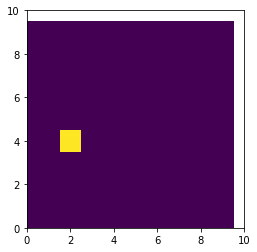

In [19]:
# %matplotlib notebook
%matplotlib inline

nb_frame = 200
e1 = np.zeros((n,nb_frame))
e1[42][0] = m**2

for i in range(nb_frame):
    if i == 0:
        continue
    e1[:,i] = e1[:,i-1].T @ A

import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(xlim=(0, m), ylim=(0, m))

im=plt.imshow((e1[:,1].T).reshape(m,m), interpolation='nearest', vmin=0, vmax=2)

# animation function.  This is called sequentially
def animate(i):
    im.set_array((e1[:,i].T).reshape(m,m))
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=nb_frame)

plt.show()